The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


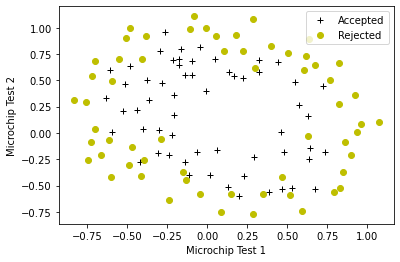

In [2]:
"""
Created on Thursday October 2022

@author: Mithrandir - Şaban Kara
"""

import numpy as np
import matplotlib.pyplot as plt
from utils import load_data, plot_data, plot_decision_boundary, map_feature
import copy
import math

# load dataset
X_train, y_train = load_data("data/ex2data2.txt")


print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")
plt.legend(loc="upper right")

plt.ylabel('Microchip Test 2') 
plt.xlabel('Microchip Test 1') 

plt.show()


In [3]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [4]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [8]:
def sigmoid(z):
          
    g = 1/(1 + np.exp(-z))
    
    return g


def compute_cost(X, y, w, b, lambda_= 1):

    m, n = X.shape

    cost = 0
    for i in range(m):
        z = np.dot(X[i],w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1-y[i])*np.log(1-f_wb)
    total_cost = cost/m

    return total_cost


m, n = X_train.shape
print("m: ", m)
print("n: ", n)



def compute_gradient(X, y, w, b, lambda_=None): 

    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        
        f_wb_i = sigmoid(np.dot(X[i],w) + b)    
        
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m  

        
    return dj_db, dj_dw


def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing


def compute_cost_reg(X, y, w, b, lambda_ = 1):

    m, n = X.shape
    cost_without_reg = compute_cost(X, y, w, b) 

    reg_cost = 0.
    reg_cost = sum(np.square(w))
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost

X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)


def compute_gradient_reg(X, y, w, b, lambda_ = 1): 

    m, n = X.shape
    dj_db, dj_dw = compute_gradient(X, y, w, b)
  
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]           
        
    return dj_db, dj_dw


X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )


# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

m:  118
n:  2
Regularized cost : 0.6618252552483948
dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548703, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]
Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


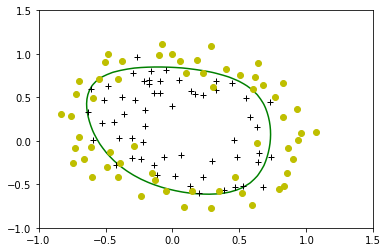

In [9]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [13]:
#Compute accuracy on the training set

def predict(X, w, b): 

    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    # Loop over each example
    for i in range(m):   
        z_wb = np.dot(X[i],w) 
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb += 0
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        p[i] = 1 if f_wb>0.5 else 0

    return p

p = predict(X_mapped, w, b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
